In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
df = pd.read_csv("application_data.csv")
df = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 
            'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
            'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
            'OCCUPATION_TYPE']]

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,-9461,-637,Laborers
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,-16765,-1188,Core staff
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,-19046,-225,Laborers
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,-19005,-3039,Laborers
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,-19932,-3038,Core staff


# 1a

In [4]:
df['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

<AxesSubplot:ylabel='TARGET'>

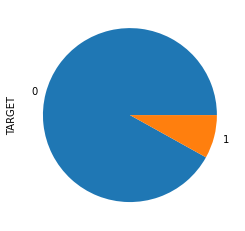

In [5]:
fig, ax = plt.subplots()
df['TARGET'].value_counts().plot(ax=ax, kind='pie')

* I chose to use a pie chart, as target only has two values and to see how subjects with target=0 or 1 compare to the whole picture.
* There are no outliers shown in the pie chart, as TARGET only has 0 or 1 as its values to indicate whether the subject has difficulty in paying back or not. 

# 1b

<AxesSubplot:>

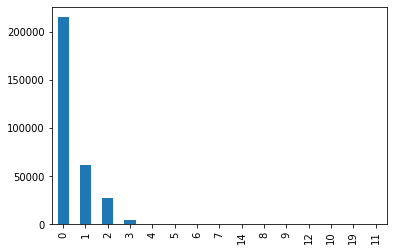

In [6]:
fig, ax = plt.subplots()
df['CNT_CHILDREN'].value_counts().plot(ax=ax, kind='bar')


* I chose to use a bar graph because I wanted to display the frequency of different counts of children
* There are no outliers in the bar graph. The graph is right-skewed as most subjects don't have any children and some have 1,2, or 3 children. 

# 1c

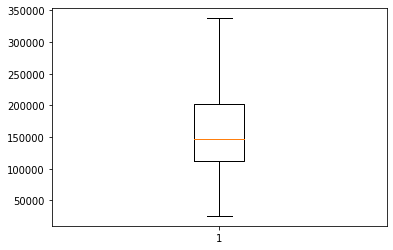

In [7]:
plt.boxplot(df['AMT_INCOME_TOTAL'], showfliers=False) # no outliers
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x272830755b0>,
 'caps': [<matplotlib.lines.Line2D at 0x27283075cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27283075220>],
 'medians': [<matplotlib.lines.Line2D at 0x27283080430>],
 'fliers': [<matplotlib.lines.Line2D at 0x272830807c0>],
 'means': []}

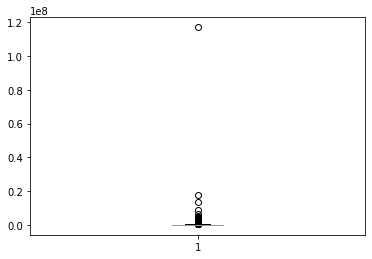

In [8]:
plt.boxplot(df['AMT_INCOME_TOTAL']) # with outliers

* I used a boxplot to graph this data to clearly view the distributions of the data and to clearly visualize the outliers.
* The outlier at 1.2 as shown in the boxplot with outliers displayed is most surprising to me, as it deviates significantly from the rest of the data points. This raises the question what occupation is this subject working to receive such a high income compared to the majority. This also raises the concern that people are not paid fairly, which is clearly shown in the second box plot. 

# 1d

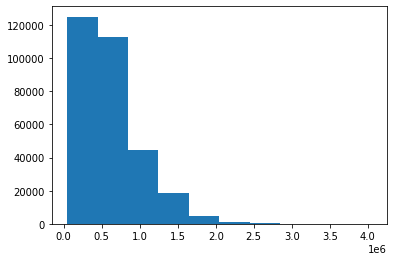

In [9]:
plt.hist(df['AMT_CREDIT'])
plt.show()

* I chose to use a histogram to display the distrbituion of the data in AMT_CREDIT
* There are no surprising outliers.

# 1e

In [10]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

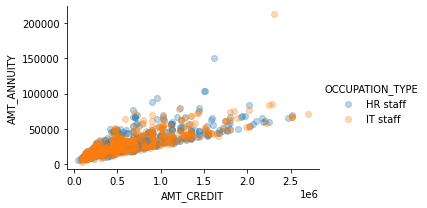

In [11]:
_occupation = ['HR staff', 'IT staff']
fg = sns.FacetGrid(data=df[df['OCCUPATION_TYPE'].isin(['HR staff', 'IT staff'])], hue='OCCUPATION_TYPE', hue_order=_occupation, aspect=1.61)
fg.map(plt.scatter, 'AMT_CREDIT', 'AMT_ANNUITY', alpha=0.3).add_legend()

* I chose to use a scatterplot to compare HR staff vs IT staff populations and the relationship they have with two numeric variables: AMT_ANNUITY and AMT_CREDIT.
* The point at about (1.6, 150000) and (2.4, 200000) are surprising outliers as they deviate greatly from the majority. I believe these correspond to the subjects that have a higher role in the industry (i.e. managers, CEOs, etc) as there are few of those in the real world compared to regular employees. This matches the points displayed, as the majority are represented by regular employees, and the outliers are represented by the higher-ups.

# 2.1

In [33]:
df['CODE_GENDER'].value_counts()
df.loc[(df['CODE_GENDER'] != 'F') & (df['CODE_GENDER'] != 'M'), 'CODE_GENDER'] = 'F'

# 2.2

In [13]:
df[['DAYS_BIRTH', 'DAYS_EMPLOYED']].head()

,DAYS_BIRTH,DAYS_EMPLOYED
0,-9461,-637
1,-16765,-1188
2,-19046,-225
3,-19005,-3039
4,-19932,-3038


In [3]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs()
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()
year_birth = df['DAYS_BIRTH']/365
year_employed = df['DAYS_EMPLOYED']/365

In [4]:
df = df.rename(columns = {'DAYS_BIRTH': 'YEARS_BIRTH', 'DAYS_EMPLOYED': 'YEARS_EMPLOYED'})

In [5]:
df['YEARS_BIRTH'] = year_birth
df['YEARS_EMPLOYED'] = year_employed
df[['YEARS_BIRTH', 'YEARS_EMPLOYED']]

,YEARS_BIRTH,YEARS_EMPLOYED
0,25.920548,1.745205
1,45.931507,3.254795
2,52.180822,0.616438
3,52.068493,8.326027
4,54.608219,8.323288
...,...,...
307506,25.553425,0.646575
307507,56.917808,1000.665753
307508,41.002740,21.701370
307509,32.769863,13.112329


# 2.3

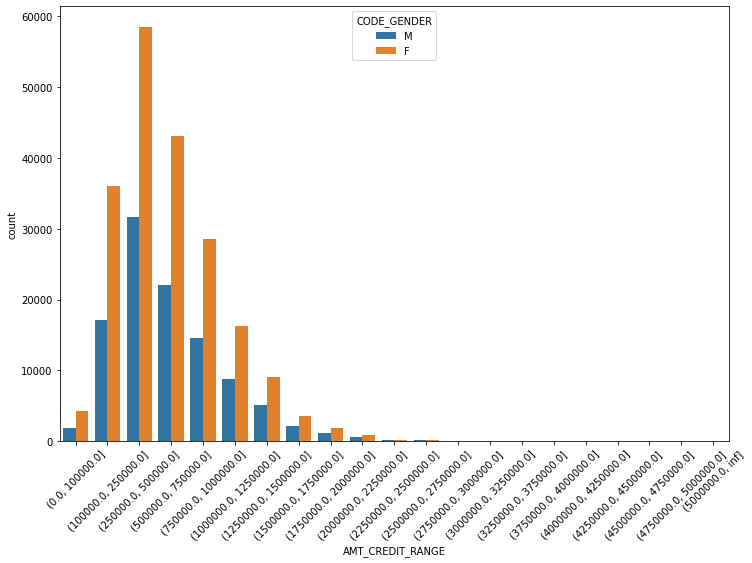

In [40]:
# 0-100000,100000-250000 ..... 4,750,000-5000000, 5000000 and above
bins = [0, 100000, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000,
       2000000, 2250000, 2500000, 2750000, 3000000, 3250000, 3750000, 4000000,
       4250000, 4500000, 4750000, 5000000, math.inf]
# print(len(bins)) # 22
df['AMT_INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'], bins)
df['AMT_CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT'], bins)
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='AMT_CREDIT_RANGE', hue='CODE_GENDER')
plt.xticks(rotation=45)
plt.show()

# 3.1

In [ ]:
df['TARGET'].value_counts()

In [ ]:
df['TARGET'].value_counts()[1] / df['TARGET'].value_counts()[0]

* Ratio of those with difficulty in paying back versus those who do not is 0.0878.

In [6]:
df_target_zero = df[df['TARGET'] == 0]
df_target_one = df[df['TARGET'] == 1]

# 3.2

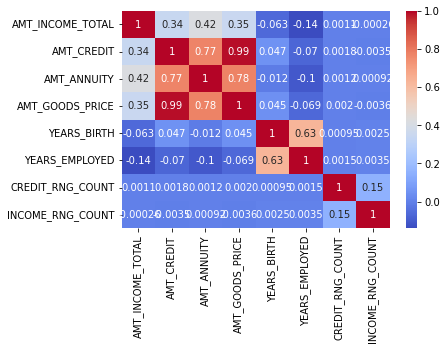

In [20]:
zero_df = df_target_zero.select_dtypes(include=[np.number])
zero_df = zero_df.drop(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN'], axis=1)
matrix = zero_df.corr()
sns.heatmap(matrix, cmap='coolwarm', annot=True)
plt.show()

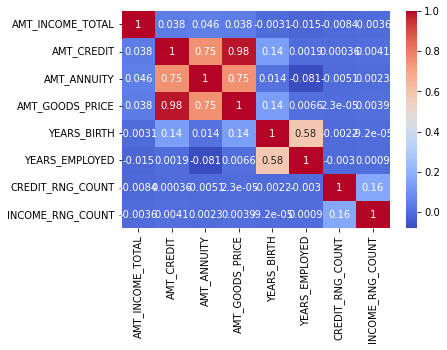

In [21]:
one_df = df_target_one.select_dtypes(include=[np.number])
one_df = one_df.drop(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN'], axis=1)
matrix = one_df.corr()
sns.heatmap(matrix, cmap='coolwarm', annot=True)
plt.show()

# 3.3 

c:\users\acann\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEARS_EMPLOYED'>

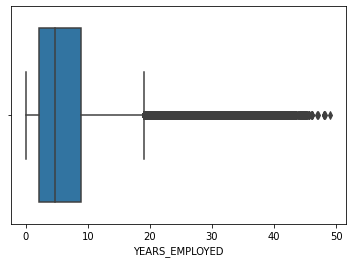

In [22]:
# without difficulty
sns.boxplot(df_target_zero[df_target_zero['YEARS_EMPLOYED'] < 200]['YEARS_EMPLOYED'], showfliers=True)

<AxesSubplot:>

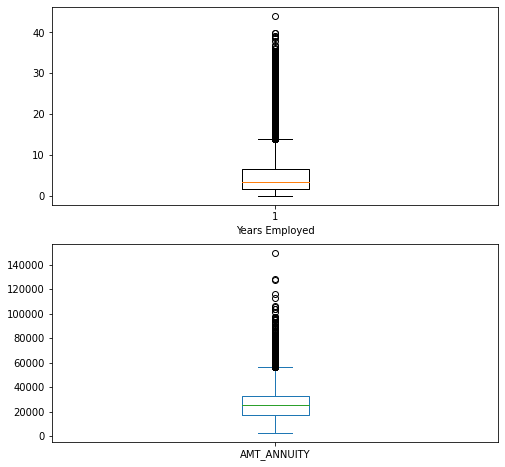

In [23]:
# with difficulty
fig, ax = plt.subplots(2, figsize=(8,8))
ax[0].boxplot(df_target_one[df_target_one['YEARS_EMPLOYED'] < 200]['YEARS_EMPLOYED'], showfliers=True)
ax[0].set_xlabel('Years Employed')
df_target_one['AMT_ANNUITY'].plot(kind='box', showfliers=True)


* I filtered this data to be less than 200 because no human is able to reach 200 years of age(that we know of).

# 3.4

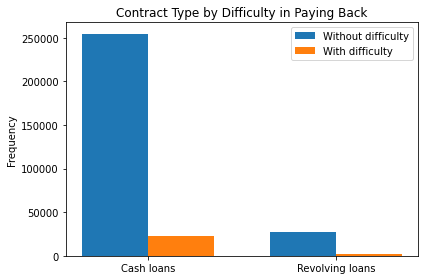

In [24]:
labels = ['Cash Loans', 'Revolving Loans']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_target_zero['NAME_CONTRACT_TYPE'].value_counts(), width, label='Without difficulty')
rects2 = ax.bar(x + width/2, df_target_one['NAME_CONTRACT_TYPE'].value_counts(), width, label='With difficulty')
ax.set_ylabel('Frequency')
ax.set_title('Contract Type by Difficulty in Paying Back')
ax.set_xticks(x)
ax.set_xticklabels(['Cash loans', 'Revolving loans'])
ax.legend()

fig.tight_layout()

plt.show()


In [ ]:
labels = ['Female', 'Male']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_target_zero['CODE_GENDER'].value_counts(), width, label='Without difficulty')
rects2 = ax.bar(x + width/2, df_target_one['CODE_GENDER'].value_counts(), width, label='With difficulty')
ax.set_ylabel('Frequency')
ax.set_title('Code Gender by Difficulty in Paying Back')
ax.set_xticks(x)
ax.set_xticklabels(['Female', 'Male'])
ax.legend()

fig.tight_layout()

plt.show()


# 3.5a

In [ ]:
plt.scatter(y=df_target_zero[df_target_zero['YEARS_EMPLOYED'] < 1000]['AMT_INCOME_TOTAL'], x=df_target_zero[df_target_zero['YEARS_EMPLOYED'] < 1000]['YEARS_EMPLOYED'])

In [ ]:
plt.scatter(y=df_target_one[df_target_one['YEARS_EMPLOYED'] < 1000]['AMT_INCOME_TOTAL'], x=df_target_one[df_target_one['YEARS_EMPLOYED'] < 1000]['YEARS_EMPLOYED'])

# 3.5b

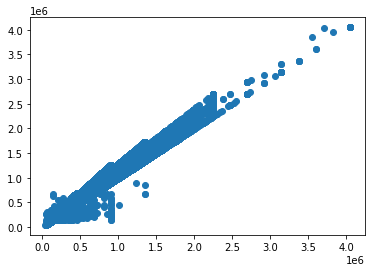

In [7]:
plt.scatter(x=df_target_zero['AMT_GOODS_PRICE'], y=df_target_zero['AMT_CREDIT'])

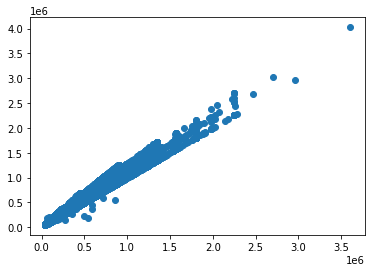

In [8]:
plt.scatter(df_target_one['AMT_GOODS_PRICE'], df_target_one['AMT_CREDIT'])

* The second set of scatterplots have a more distinct relationship than the first set of scatterplots. Part b scatter plots follow a linear relationship, while part a scatter plots don't exactly follow a clear pattern. Part a also has a lot more deviation and outliers, while most of the data for part B follows the linear pattern.

# 4a 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Higher education'),
  Text(1, 0, 'Secondary / secondary special'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

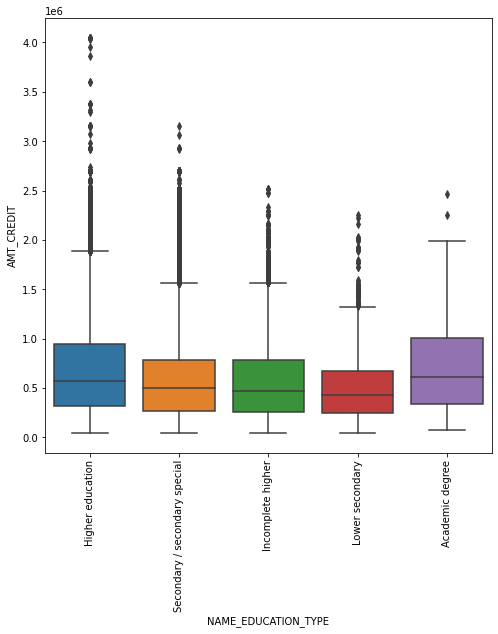

In [41]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.boxplot(x=df_target_zero['NAME_EDUCATION_TYPE'], y=df_target_zero['AMT_CREDIT'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Secondary / secondary special'),
  Text(1, 0, 'Incomplete higher'),
  Text(2, 0, 'Higher education'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

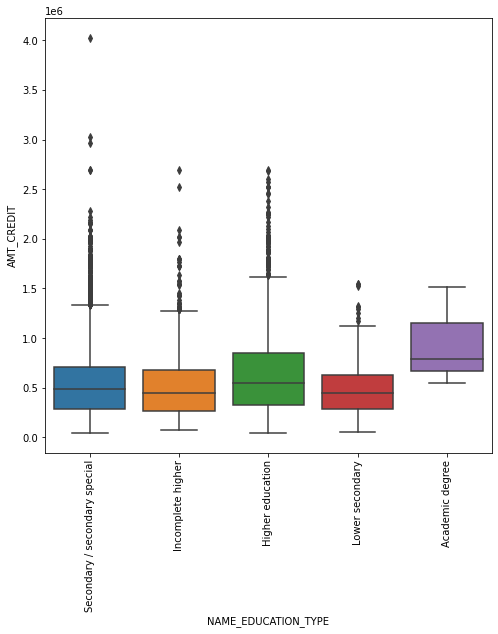

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(x=df_target_one['NAME_EDUCATION_TYPE'], y=df_target_one['AMT_CREDIT'])
plt.xticks(rotation=90)

In [ ]:
df_target_one['NAME_EDUCATION_TYPE'].value_counts()

Least significant difference: secondary/secondary special 
\
Most significant difference: academic degree

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(x=df_target_zero['OCCUPATION_TYPE'], y=df_target_zero['AMT_CREDIT'], showfliers=True)
plt.xticks(rotation=90)

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(x=df_target_one['OCCUPATION_TYPE'], y=df_target_one['AMT_CREDIT'], showfliers=True)
plt.xticks(rotation=90)

Most significant difference: HR staff 
\
Least significant difference: Private service staff

# 4b.i

I chose the following attribute values by comparing the boxplots shown in the previous question -- I compared each boxplots min, Q1, median, Q3, and max. I chose the least significant difference attributes based on the ones that were the most similar in regards to the boxplot characteristics I listed before, and vice versa for the most significant difference by finding the ones that were the least similar. 

Hypotheses about least significant difference for OCCUPATION_TYPE: 
* H<sub>0</sub>: No difference in difficulty in paying back (amount credit) among private service staff. 

* H<sub>1</sub>: There is a difference in difficulty in paying back (amount credit) among private service staff. 

Hypotheses about most significant difference for OCCUPATION_TYPE: 
* H<sub>0</sub>: No difference in difficulty in paying back (amount credit) among HR staff. 

* H<sub>1</sub>: There is a difference in difficulty in paying back (amount credit) among HR staff. 

Hypotheses about least significant difference for NAME_EDUCATION_TYPE:
* H<sub>0</sub>: No difference difficulty in paying back (amount credit) in those with a secondary/secondary special education. 

* H<sub>1</sub>: There is a difference in difficulty in paying back (amount credit) in those with a secondary/secondary special education. 

Hypotheses about most significant difference for NAME_EDUCATION_TYPE:
* H<sub>0</sub>: No difference difficulty in paying back (amount credit) in those with an academic degree. 

* H<sub>1</sub>: There is a difference in difficulty in paying back (amount credit) in those with an academic degree. 


# 4b.ii

* I will be performing a two-sided 2-sample independent t-test to assess my hypotheses. 

In [47]:
import scipy.stats as st

### Testing hypothesis about least significant difference for OCCUPATION_TYPE


In [ ]:
t, p = st.ttest_ind(df_target_zero[df_target_zero['OCCUPATION_TYPE'] == 'Private service staff']['AMT_CREDIT'], df_target_one[df_target_one['OCCUPATION_TYPE'] == 'Private service staff']['AMT_CREDIT'])

In [ ]:
p

In [ ]:
t

* I am using a two-sided two-sample independent t-test, as the populations being measured are different (difficulty paying back vs no difficulty), and I'm testing if the population means are different (not equal). The resulting t-statistic is 0.754, and the p-value is 0.451. Because the p-value is larger than alpha=0.05, we fail to reject the null hypothesis. There is not sufficient evidence that there is a difference. 

### Testing hypothesis about most significant difference for OCCUPATION_TYPE

In [ ]:
t, p = st.ttest_ind(df_target_zero[df_target_zero['OCCUPATION_TYPE'] == 'HR staff']['AMT_CREDIT'], df_target_one[df_target_one['OCCUPATION_TYPE'] == 'HR staff']['AMT_CREDIT'])

In [ ]:
p

In [ ]:
t

* I am using a two-sided two-sample independent t-test, as the populations being measured are different (difficulty paying back vs no difficulty), and I'm testing if the population means are different (not equal). The resulting t-statistic is 0.317, and the p-value is 0.751. Because the p-value is larger than alpha=0.05, we fail to reject the null hypothesis. There is not sufficient evidence that there is a difference. 

### Testing hypothesis about least significant difference for NAME_EDUCATION_TYPE

In [85]:
t, p = st.ttest_ind(df_target_zero[df_target_zero['NAME_EDUCATION_TYPE'] == 'Academic degree']['AMT_CREDIT'], df_target_one[df_target_one['NAME_EDUCATION_TYPE'] == 'Academic degree']['AMT_CREDIT'])

In [86]:
p

0.4064062230764216

In [ ]:
t

* I am using a two-sided two-sample independent t-test, as the populations being measured are different (difficulty paying back vs no difficulty), and I'm testing if the population means are different (not equal). The resulting t-statistic is -0.832, and the p-value is 0.406. Because the p-value is greater than alpha=0.05, we fail to reject the null hypothesis. There is not sufficient evidence that there is a difference. 

### Testing hypothesis about most significant difference for NAME_EDUCATION_TYPE

In [ ]:
t, p = st.ttest_ind(df_target_zero[df_target_zero['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special']['AMT_CREDIT'], df_target_one[df_target_one['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special']['AMT_CREDIT'])

In [52]:
p

0.8656751045630009

In [ ]:
t

* I am using a two-sided two-sample independent t-test, as the populations being measured are different (difficulty paying back vs no difficulty), and I'm testing if the population means are different (not equal). The resulting t-statistic is 11.276, and the p-value is 1.761*10^(-29). Because the p-value is less than alpha=0.05, we reject the null hypothesis. There is sufficient evidence that there is a difference. 

# 4b.iii

Bonferroni correction is appropriate when a false positive would yield a problem and to reduce the chances of a Type I error (rejecting null when null is actually true) occurring when multiple tests are performed on a single dataset. 

In [89]:
# secondary/secondary special most sig diff for education type
sample_df_zero = df_target_zero[df_target_zero['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special']['AMT_CREDIT'].sample(n=100, replace=True)
sample_df_one = df_target_one[df_target_one['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special']['AMT_CREDIT'].sample(n=100, replace=True)
t, p = st.ttest_ind(sample_df_zero, sample_df_one)

In [90]:
p

0.8187989405927343

In [87]:
# academic degree least sig diff for education type
sample_df_zero = df_target_zero[df_target_zero['NAME_EDUCATION_TYPE'] == 'Academic degree']['AMT_CREDIT'].sample(n=100, replace=True)
sample_df_one = df_target_one[df_target_one['NAME_EDUCATION_TYPE'] == 'Academic degree']['AMT_CREDIT'].sample(n=100, replace=True)
t, p = st.ttest_ind(sample_df_zero, sample_df_one)

In [88]:
p

0.027929274491189968

In [80]:
# HR staff most sig diff for occupation type
# for i in range(10):
sample_df_zero = df_target_zero[df_target_zero['OCCUPATION_TYPE'] == 'HR staff']['AMT_CREDIT'].sample(n=100, replace=True)
sample_df_one = df_target_one[df_target_one['OCCUPATION_TYPE'] == 'HR staff']['AMT_CREDIT'].sample(n=100, replace=True)
t, p = st.ttest_ind(sample_df_zero, sample_df_one)

In [81]:
p

0.38720502685391844

In [83]:
# HR staff most sig diff for occupation type
sample_df_zero = df_target_zero[df_target_zero['OCCUPATION_TYPE'] == 'Private service staff']['AMT_CREDIT'].sample(n=100, replace=True)
sample_df_one = df_target_one[df_target_one['OCCUPATION_TYPE'] == 'Private service staff']['AMT_CREDIT'].sample(n=100, replace=True)
t, p = st.ttest_ind(sample_df_zero, sample_df_one)

In [84]:
p

0.7580710144796725